In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\data sets\Sentiment_Stock_data.csv")

In [3]:
df.head()

,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [4]:
df.shape

(108751, 3)

In [5]:
df.drop(columns = "Unnamed: 0",axis = 1,inplace = True)

In [6]:
df.dtypes

Sentiment     int64
Sentence     object
dtype: object

In [7]:
df["Sentence"] = df["Sentence"].astype(str)

In [8]:
df["Sentiment"].value_counts()

Sentiment
1    55725
0    53026
Name: count, dtype: int64

In [9]:
df["Sentiment"].value_counts(normalize = True)

Sentiment
1    0.512409
0    0.487591
Name: proportion, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

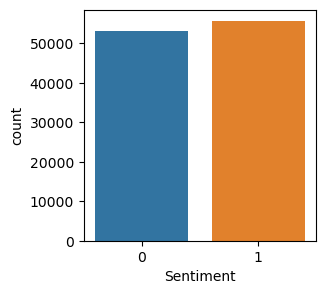

In [11]:
fig,ax = plt.subplots(figsize= (3,3))
ax.set_title = ("Feature Distribution")
sns.countplot(data = df, x = "Sentiment")
plt.show()

In [12]:
df.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


### EDA

In [13]:
#separate positive reviews
pos_reviews = df[df["Sentiment"] == 1]
pos_reviews.head()

,Sentiment,Sentence
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."
5,1,Finnish Talentum reports its operating profit ...


In [14]:
# separate negative reviews
neg_reviews = df[df["Sentiment"] == 0]
neg_reviews.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
36,0,At the request of Finnish media company Alma M...
37,0,STOCK EXCHANGE ANNOUNCEMENT 20 July 2006 1 ( 1...
38,0,"A maximum of 666,104 new shares can further be..."
39,0,Tiimari operates 194 stores in six countries -...


In [15]:
#positive review words most frequent words and count
from collections import Counter
import numpy as np

count = Counter()
for data in pos_reviews['Sentence'].values:
    for word in data.split():
        count[word] = count[word] + 1
top_20_words_pos = count.most_common(20)

In [16]:
top_20_words_pos

[('the', 19714),
 ('to', 19398),
 ('of', 16379),
 ('in', 15526),
 ('a', 9803),
 ('and', 9332),
 ('for', 8017),
 ('on', 6092),
 ('is', 4225),
 ('-', 4050),
 ('The', 3799),
 ('by', 3710),
 ('from', 3269),
 ('with', 3117),
 ('as', 3052),
 ('that', 2930),
 ('has', 2872),
 ('at', 2590),
 ('be', 2178),
 ('are', 2120)]

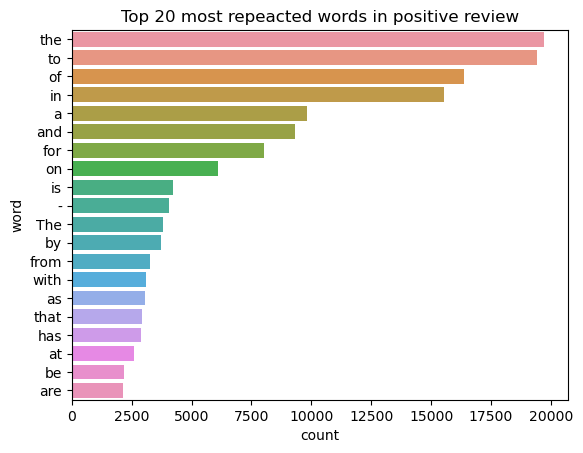

In [17]:
pos_words_df = pd.DataFrame(top_20_words_pos,columns=["word","count"])

sns.barplot(data = pos_words_df,x = "count",y = "word")
plt.title("Top 20 most repeacted words in positive review")
plt.show()

In [18]:
#negative review words most frequent words and count
for data in neg_reviews["Sentence"].values:
    for word in data.split():
        count[word] = count[word] + 1
neg_reviews_top_20 = count.most_common(20)

In [19]:
neg_reviews_top_20

[('the', 40730),
 ('to', 37377),
 ('of', 32956),
 ('in', 30524),
 ('and', 19452),
 ('a', 19372),
 ('for', 15827),
 ('on', 12089),
 ('is', 8858),
 ('The', 8348),
 ('-', 7778),
 ('by', 7186),
 (',', 6863),
 ('as', 6262),
 ('with', 6255),
 ('from', 6254),
 ('has', 5674),
 ('that', 5649),
 ('at', 5199),
 ('.', 5065)]

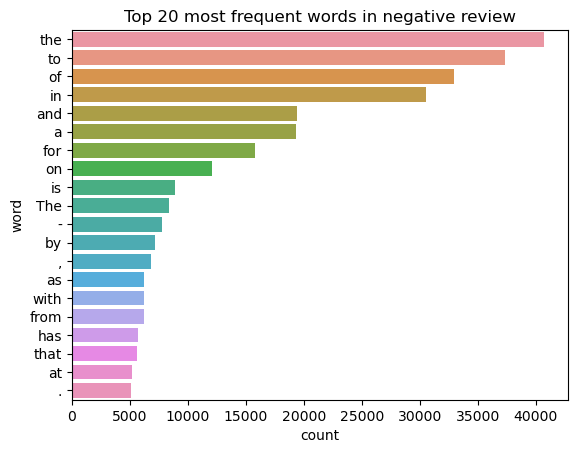

In [20]:
neg_words_df = pd.DataFrame(neg_reviews_top_20, columns=["word","count"])

sns.barplot(data = neg_words_df,x = "count",y = "word")
plt.title("Top 20 most frequent words in negative review")
plt.show()

In [21]:
from wordcloud import WordCloud

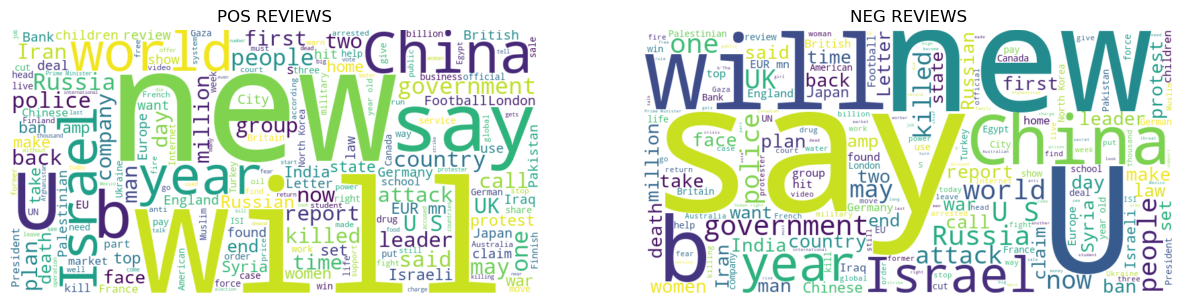

In [22]:
from wordcloud import WordCloud

# word colud for positive review
pos_words = " ".join(pos_reviews["Sentence"].values)
pos_word_cloud = WordCloud(width = 800, height = 400, background_color = "white").generate(pos_words)

# word cloud for negative review
neg_words = " ".join(neg_reviews["Sentence"].values)
neg_word_cloud = WordCloud(width = 800, height = 400, background_color = "white").generate(neg_words)

# Display the word clouds

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(neg_word_cloud,interpolation = "bilinear")
ax[0].axis("off")
ax[0].set_title("POS REVIEWS")
ax[1].imshow(pos_word_cloud,interpolation = "bilinear")
ax[1].axis("off")
ax[1].set_title("NEG REVIEWS")
plt.show()


## **Step 3 - Segregate Inputs (X) and Output (y)**

In [23]:
y = df["Sentiment"]

X = df[["Sentence"]]

## **Step 4 - Split the data into Train and Test**

In [24]:
# splitting train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(87000, 1) (87000,)
(21751, 1) (21751,)


In [25]:
X_train

,Sentence
107622,Myanmar has banned lucrative logging operation...
67994,"b""Greeces public debt: Can't afford to keep pe..."
51401,Marching on
58428,"Woolrich premiere, Snape Maltings, Aldeburgh"
44160,Why malaria is Africa's problem
...,...
54886,Blade Runner: The Final Cut
76820,Australian climate scientists receive death th...
103694,Vivienne Westwood drives tank to David Cameron...
860,"- Inge Larsen (CFO), 29,045 shares , represent..."


In [26]:
from tqdm import tqdm
import contractions

tqdm.pandas()
# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

X_train["contraction_clean"] = X_train["Sentence"].progress_apply(lambda text: expand_contractions(text))

X_train.head()

100%|█████████████████████████████████████████████████████████████████████████| 87000/87000 [00:00<00:00, 90374.54it/s]


,Sentence,contraction_clean
107622,Myanmar has banned lucrative logging operation...,Myanmar has banned lucrative logging operation...
67994,"b""Greeces public debt: Can't afford to keep pe...","b""Greeces public debt: Cannot afford to keep p..."
51401,Marching on,Marching on
58428,"Woolrich premiere, Snape Maltings, Aldeburgh","Woolrich premiere, Snape Maltings, Aldeburgh"
44160,Why malaria is Africa's problem,Why malaria is Africa's problem


## **Step 5 - Apply Data Preparation on Train Data**

In [27]:
import re
import nltk
import contractions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

In [28]:
# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\solmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\solmo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
stop_words = list(set(stopwords.words("english")))
stop_words

['off',
 'too',
 'because',
 'an',
 'do',
 'so',
 "needn't",
 'o',
 'each',
 'being',
 'own',
 'hadn',
 "shan't",
 'of',
 'than',
 'have',
 'themselves',
 "wasn't",
 'weren',
 "shouldn't",
 'won',
 'whom',
 'i',
 'wouldn',
 'mightn',
 'while',
 'just',
 'has',
 "didn't",
 'over',
 'had',
 'them',
 'some',
 "haven't",
 'down',
 'above',
 'out',
 'this',
 'should',
 'to',
 'through',
 'under',
 'mustn',
 'ours',
 'you',
 'at',
 'me',
 'hasn',
 "won't",
 'isn',
 'how',
 'did',
 'they',
 'as',
 'a',
 'yours',
 "should've",
 "she's",
 'what',
 'are',
 'be',
 'm',
 'their',
 "aren't",
 'about',
 'doesn',
 'am',
 'does',
 'by',
 'any',
 'his',
 'which',
 'having',
 'below',
 'is',
 'been',
 'same',
 "hadn't",
 "mightn't",
 'but',
 'theirs',
 'or',
 'once',
 "you've",
 'her',
 'nor',
 'him',
 'from',
 'there',
 'herself',
 "that'll",
 'and',
 'these',
 'll',
 'most',
 'until',
 'where',
 'doing',
 'was',
 'd',
 "isn't",
 'then',
 'before',
 'hers',
 'yourselves',
 'y',
 'we',
 'ma',
 'during',

In [30]:
def clean_data(text):
    
    # convert lower case
    text = text.lower()
    
    # remove HTML TAGS
    text = re.sub(r'<[^>]+>', " ",text)
    
    
    
    
    # remove url
    text = re.sub(r'https?://\S+|www\.\S+', repl=' ', string=text)
    
    #remove numbers
    text = re.sub(r'\d+',repl = " ", string = text)
    
    # Remove punctuation
    text = text.translate(str.maketrans(" "," ", string.punctuation))
    
    ## removing break tags
    text = re.sub(r'<br />','',text)
    
    # Remove leading, trailing, and multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove emojis 
    text = re.sub(r'[^\w\s,]', '', text)
    
    # Remove emoticons 
    text = re.sub(r'[:;]-?[\)\(D]', '', text)
    
    # tokenize
    tokens = word_tokenize(text)
    
     # removing stop words
    stop_words = list(set(stopwords.words('english')))
    filtered_words = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    lem = WordNetLemmatizer()
    lem_tokens = [lem.lemmatize(token) for token in filtered_words]
    
    # Join the tokens back into a single string
    preprocessed_text = " ".join(lem_tokens)
    
    return preprocessed_text
    

In [31]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

df["word_count"] = df["Sentence"].apply(no_of_words)

In [32]:
from tqdm import tqdm
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# now i can apply "progress_apply" instead "apply" and also "progress_map" instead "map"

X_train["contraction_clean_text"] = X_train["contraction_clean"].progress_apply(lambda text: clean_data(text))

X_train.head()

100%|██████████████████████████████████████████████████████████████████████████| 87000/87000 [00:47<00:00, 1815.21it/s]


,Sentence,contraction_clean,contraction_clean_text
107622,Myanmar has banned lucrative logging operation...,Myanmar has banned lucrative logging operation...,myanmar banned lucrative logging operation new...
67994,"b""Greeces public debt: Can't afford to keep pe...","b""Greeces public debt: Cannot afford to keep p...",bgreeces public debt afford keep people health...
51401,Marching on,Marching on,marching
58428,"Woolrich premiere, Snape Maltings, Aldeburgh","Woolrich premiere, Snape Maltings, Aldeburgh",woolrich premiere snape maltings aldeburgh
44160,Why malaria is Africa's problem,Why malaria is Africa's problem,malaria africa problem


In [33]:
X_train["contraction_clean_text"][107622]

'myanmar banned lucrative logging operation newlyelected government democracy leader aung san suu kyi step battle deforestation environment official said thursday'

In [34]:
y_train

107622    0
67994     1
51401     0
58428     1
44160     1
         ..
54886     0
76820     0
103694    0
860       0
15795     0
Name: Sentiment, Length: 87000, dtype: int64

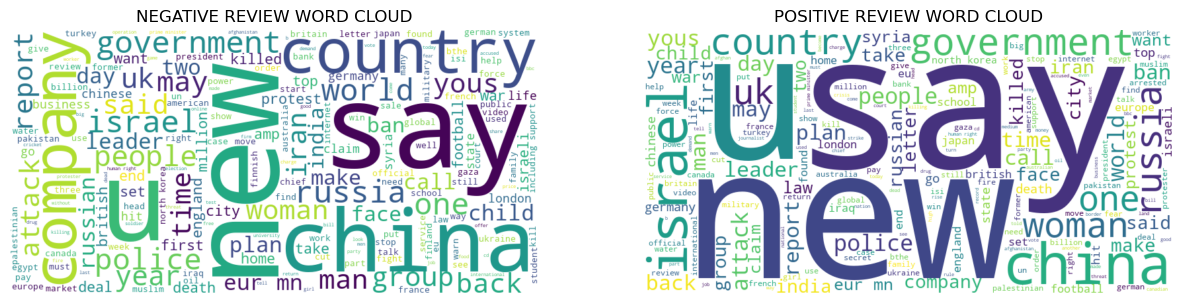

In [35]:
# visulization of negative review and positive review



neg_review_text = " ".join(X_train[y_train == 0]["contraction_clean_text"].values)
neg_review_wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(neg_review_text)

pos_review_text = " ".join(X_train[y_train == 1]["contraction_clean_text"].values)
pos_review_wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(pos_review_text)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(neg_review_wordcloud,interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("NEGATIVE REVIEW WORD CLOUD")
ax[1].imshow(pos_review_wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("POSITIVE REVIEW WORD CLOUD")
plt.show()


## **2. Generating Word2Vec Representations**

**Step 1** - Convert the sentences to the List of Words (i.e. List of Tokens)  
**Step 2** - Import `Word2Vec` module from `gensim.models`  
**Step 3** - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.  
**Step 4** - Convert the word vectors to document vectors.

## Step 1 - Convert the sentences to the List of Words (i.e. List of Tokens)

In [36]:
X_train["transformed_contraction_clean_text"] = X_train["contraction_clean_text"].apply(lambda text: text.split())
X_train.head()

,Sentence,contraction_clean,contraction_clean_text,transformed_contraction_clean_text
107622,Myanmar has banned lucrative logging operation...,Myanmar has banned lucrative logging operation...,myanmar banned lucrative logging operation new...,"[myanmar, banned, lucrative, logging, operatio..."
67994,"b""Greeces public debt: Can't afford to keep pe...","b""Greeces public debt: Cannot afford to keep p...",bgreeces public debt afford keep people health...,"[bgreeces, public, debt, afford, keep, people,..."
51401,Marching on,Marching on,marching,[marching]
58428,"Woolrich premiere, Snape Maltings, Aldeburgh","Woolrich premiere, Snape Maltings, Aldeburgh",woolrich premiere snape maltings aldeburgh,"[woolrich, premiere, snape, maltings, aldeburgh]"
44160,Why malaria is Africa's problem,Why malaria is Africa's problem,malaria africa problem,"[malaria, africa, problem]"


## Step 2 - Import Word2Vec module from gensim.models

In [37]:
from gensim.models import Word2Vec

## Step 3 - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.

In [59]:
import time

%time word_2_vec_vect = Word2Vec(X_train["transformed_contraction_clean_text"],vector_size = 100,min_count=1)

print( word_2_vec_vect)

CPU times: total: 8.86 s
Wall time: 6.49 s
Word2Vec<vocab=48242, vector_size=100, alpha=0.025>


In [84]:
word_2_vec_vect = Word2Vec(X_train["transformed_contraction_clean_text"],vector_size = 100,min_count=1)

# Save the Word2Vec model
word_2_vec_vect.save("word2vec_model.bin")

In [60]:
# We can check out what is learned by "word2vec_vect"
print(f"Number of documents used for Training: {word_2_vec_vect.corpus_count}")
print()
print(f"Vocabulary size: {len(word_2_vec_vect.wv.index_to_key)}")
print()
print(f"Vector Size: {word_2_vec_vect.vector_size}")

Number of documents used for Training: 87000

Vocabulary size: 48242

Vector Size: 100


## Step 4 - Convert the word vectors to document vectors.

In [61]:
def get_document_vect(text,model):
    
    """ Remove out of vocabulary
     creating document word vector by averaging word vector"""
    
    tokens = [word for word in text if word in model]
    
    if tokens:
        
        text_embedding = np.mean(model[tokens], axis = 0)
    else:
        text_embedding = np.zeros(model.vector_size)
        
    return text_embedding


In [62]:
X_train["w2v_text_embeddings"] = X_train["transformed_contraction_clean_text"].apply(lambda text: get_document_vect(text,word_2_vec_vect.wv))

X_train.head()
                

,Sentence,contraction_clean,contraction_clean_text,transformed_contraction_clean_text,w2v_text_embeddings
107622,Myanmar has banned lucrative logging operation...,Myanmar has banned lucrative logging operation...,myanmar banned lucrative logging operation new...,"[myanmar, banned, lucrative, logging, operatio...","[0.06658957, 0.41821557, 0.21351364, 0.1686252..."
67994,"b""Greeces public debt: Can't afford to keep pe...","b""Greeces public debt: Cannot afford to keep p...",bgreeces public debt afford keep people health...,"[bgreeces, public, debt, afford, keep, people,...","[0.025289495, 0.5822365, 0.4390221, 0.42273214..."
51401,Marching on,Marching on,marching,[marching],"[-0.017722923, 0.040805437, 0.04125789, 0.0347..."
58428,"Woolrich premiere, Snape Maltings, Aldeburgh","Woolrich premiere, Snape Maltings, Aldeburgh",woolrich premiere snape maltings aldeburgh,"[woolrich, premiere, snape, maltings, aldeburgh]","[-0.045486152, 0.045861535, 0.010648908, -0.00..."
44160,Why malaria is Africa's problem,Why malaria is Africa's problem,malaria africa problem,"[malaria, africa, problem]","[-0.39791274, 0.7497708, 0.22865109, 0.3055397..."


### **Visualizing Text Embeddings**

In [42]:
y_train

107622    0
67994     1
51401     0
58428     1
44160     1
         ..
54886     0
76820     0
103694    0
860       0
15795     0
Name: Sentiment, Length: 87000, dtype: int64

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

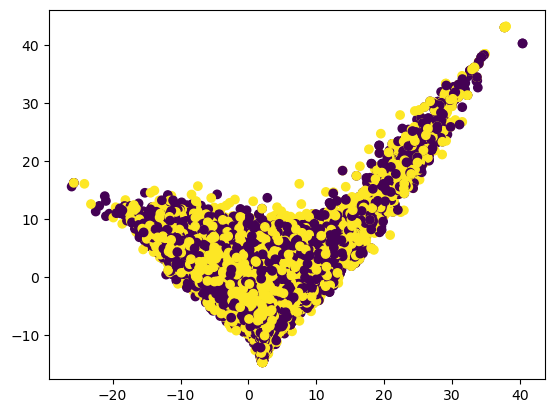

In [44]:
embedding = np.array(X_train["w2v_text_embeddings"].tolist())

# Standardize the Embeddings
standscaler = StandardScaler()
scaled_embedding = standscaler.fit_transform(embedding)

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_embedding)

pca_df = pd.DataFrame(data = pca_data, columns=["dim_1","dim_2"])
pca_df["labels"] = y_train

plt.scatter(pca_df['dim_1'], pca_df['dim_2'], c=pca_df['labels'])
plt.show()


## **Step 7 - Apply Data Preparation on Test Data**

In [45]:
from tqdm import tqdm
import contractions

tqdm.pandas()
# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

X_test["contraction_clean"] = X_test["Sentence"].progress_apply(lambda text: expand_contractions(text))

X_test.head()

100%|████████████████████████████████████████████████████████████████████████| 21751/21751 [00:00<00:00, 123755.47it/s]


,Sentence,contraction_clean
40298,Chip change could mean cheaper Apple Macs,Chip change could mean cheaper Apple Macs
71358,UK: Health inequality as severe as during the ...,UK: Health inequality as severe as during the ...
50395,Mark Gould on a welfare-to-work scheme in Shef...,Mark Gould on a welfare-to-work scheme in Shef...
78368,You Are Nobody: Thousands find themselves stat...,You Are Nobody: Thousands find themselves stat...
103927,NASA announces discovery of flowing water in Mars,NASA announces discovery of flowing water in Mars


In [46]:
X_test["contraction_clean_text"] = X_test["contraction_clean"].progress_apply(lambda text: clean_data(text))
X_test.head()

100%|██████████████████████████████████████████████████████████████████████████| 21751/21751 [00:11<00:00, 1868.23it/s]


,Sentence,contraction_clean,contraction_clean_text
40298,Chip change could mean cheaper Apple Macs,Chip change could mean cheaper Apple Macs,chip change could mean cheaper apple mac
71358,UK: Health inequality as severe as during the ...,UK: Health inequality as severe as during the ...,uk health inequality severe great depression
50395,Mark Gould on a welfare-to-work scheme in Shef...,Mark Gould on a welfare-to-work scheme in Shef...,mark gould welfaretowork scheme sheffield israel
78368,You Are Nobody: Thousands find themselves stat...,You Are Nobody: Thousands find themselves stat...,nobody thousand find stateless dominican repub...
103927,NASA announces discovery of flowing water in Mars,NASA announces discovery of flowing water in Mars,nasa announces discovery flowing water mar


## ** 2(a). Generating Word2Vec Representations on test data** 

**Step 1** - Convert the sentences to the List of Words (i.e. List of Tokens)
**Step 2** - Import "Word2Vec" module from "gensim.models"
**Step 3** - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.
**Step 4** - Convert the word vectors to document vectors.

In [47]:
X_test["transformed_contraction_clean_text"] = X_test["contraction_clean_text"].apply(lambda text: text.split())
X_test.head()

,Sentence,contraction_clean,contraction_clean_text,transformed_contraction_clean_text
40298,Chip change could mean cheaper Apple Macs,Chip change could mean cheaper Apple Macs,chip change could mean cheaper apple mac,"[chip, change, could, mean, cheaper, apple, mac]"
71358,UK: Health inequality as severe as during the ...,UK: Health inequality as severe as during the ...,uk health inequality severe great depression,"[uk, health, inequality, severe, great, depres..."
50395,Mark Gould on a welfare-to-work scheme in Shef...,Mark Gould on a welfare-to-work scheme in Shef...,mark gould welfaretowork scheme sheffield israel,"[mark, gould, welfaretowork, scheme, sheffield..."
78368,You Are Nobody: Thousands find themselves stat...,You Are Nobody: Thousands find themselves stat...,nobody thousand find stateless dominican repub...,"[nobody, thousand, find, stateless, dominican,..."
103927,NASA announces discovery of flowing water in Mars,NASA announces discovery of flowing water in Mars,nasa announces discovery flowing water mar,"[nasa, announces, discovery, flowing, water, mar]"


In [64]:
X_test["w2v_text_embeddings"] = X_test["transformed_contraction_clean_text"].apply(lambda text: get_document_vect(text,word_2_vec_vect.wv))

X_test.head()

,Sentence,contraction_clean,contraction_clean_text,transformed_contraction_clean_text,w2v_text_embeddings
40298,Chip change could mean cheaper Apple Macs,Chip change could mean cheaper Apple Macs,chip change could mean cheaper apple mac,"[chip, change, could, mean, cheaper, apple, mac]","[-0.42540368, 0.35420576, 0.078025736, 0.16704..."
71358,UK: Health inequality as severe as during the ...,UK: Health inequality as severe as during the ...,uk health inequality severe great depression,"[uk, health, inequality, severe, great, depres...","[-0.19929065, 0.36023307, 0.20901598, 0.120955..."
50395,Mark Gould on a welfare-to-work scheme in Shef...,Mark Gould on a welfare-to-work scheme in Shef...,mark gould welfaretowork scheme sheffield israel,"[mark, gould, welfaretowork, scheme, sheffield...","[-0.17719859, 0.39190322, 0.14510128, 0.419771..."
78368,You Are Nobody: Thousands find themselves stat...,You Are Nobody: Thousands find themselves stat...,nobody thousand find stateless dominican repub...,"[nobody, thousand, find, stateless, dominican,...","[-0.20954794, 0.44527587, 0.27243203, 0.166818..."
103927,NASA announces discovery of flowing water in Mars,NASA announces discovery of flowing water in Mars,nasa announces discovery flowing water mar,"[nasa, announces, discovery, flowing, water, mar]","[-0.35957062, 0.54895896, 0.14684612, 0.201047..."


## **Step 6, 8 and 9 - Training and Testing Phase**

### **a. Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# build a model
classifier = LogisticRegression()
%time classifier.fit(list(X_train["w2v_text_embeddings"]),y_train)# converting pandas series to list

# pred training data
y_train_pred = classifier.predict(list(X_train["w2v_text_embeddings"]))

# pred testing data
y_test_pred = classifier.predict(list(X_test["w2v_text_embeddings"]))

# model accuracy on trainin and testing data

train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Determine if the model is overfitting, underfitting, or has a good fit
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy > 0.1:
        print("Model is overfitting.")
    else:
        print("Model has a good fit.")
elif train_accuracy < test_accuracy:
    if test_accuracy - train_accuracy > 0.1:
        print("Model might be underfitting.")
    else:
        print("Model has a good fit.")
else:
    print("Model has a good fit.")

CPU times: total: 2.38 s
Wall time: 2.57 s
Training Accuracy: 0.5333793103448276
Test Accuracy: 0.5336306376718312
Model has a good fit.


### **B. Decision Tree**

In [71]:
from sklearn.tree import DecisionTreeClassifier

# build a model
tree = DecisionTreeClassifier()
%time tree.fit(list(X_train["w2v_text_embeddings"]),y_train)# converting pandas series to list

# pred training data
y_train_pred = tree.predict(list(X_train["w2v_text_embeddings"]))

# pred testing data
y_test_pred = tree.predict(list(X_test["w2v_text_embeddings"]))

# model accuracy on trainin and testing data

train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Determine if the model is overfitting, underfitting, or has a good fit
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy > 0.1:
        print("Model is overfitting.")
    else:
        print("Model has a good fit.")
elif train_accuracy < test_accuracy:
    if test_accuracy - train_accuracy > 0.1:
        print("Model might be underfitting.")
    else:
        print("Model has a good fit.")
else:
    print("Model has a good fit.")

CPU times: total: 33.9 s
Wall time: 39.7 s
Training Accuracy: 0.9937701149425288
Test Accuracy: 0.5172175991908418
Model is overfitting.


### **C. Random forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
%time RFC.fit(list(X_train["w2v_text_embeddings"]),y_train)# converting pandas series to list

# pred training data
y_train_pred = RFC.predict(list(X_train["w2v_text_embeddings"]))

# pred testing data
y_test_pred = RFC.predict(list(X_test["w2v_text_embeddings"]))

# model accuracy on trainin and testing data

train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Determine if the model is overfitting, underfitting, or has a good fit
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy > 0.1:
        print("Model is overfitting.")
    else:
        print("Model has a good fit.")
elif train_accuracy < test_accuracy:
    if test_accuracy - train_accuracy > 0.1:
        print("Model might be underfitting.")
    else:
        print("Model has a good fit.")
else:
    print("Model has a good fit.")

CPU times: total: 3min 32s
Wall time: 4min 6s
Training Accuracy: 0.9937701149425288
Test Accuracy: 0.5280217001517171
Model is overfitting.


### **D. Navie bayes**

In [74]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
%time nb.fit(list(X_train["w2v_text_embeddings"]),y_train)# converting pandas series to list

# pred training data
y_train_pred = nb.predict(list(X_train["w2v_text_embeddings"]))

# pred testing data
y_test_pred = nb.predict(list(X_test["w2v_text_embeddings"]))

# model accuracy on trainin and testing data

train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
test_accuracy = metrics.accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Determine if the model is overfitting, underfitting, or has a good fit
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy > 0.1:
        print("Model is overfitting.")
    else:
        print("Model has a good fit.")
elif train_accuracy < test_accuracy:
    if test_accuracy - train_accuracy > 0.1:
        print("Model might be underfitting.")
    else:
        print("Model has a good fit.")
else:
    print("Model has a good fit.")

CPU times: total: 266 ms
Wall time: 343 ms
Training Accuracy: 0.5278390804597701
Test Accuracy: 0.5294928968783045
Model has a good fit.


## Model deplyoment

In [75]:
import joblib

In [80]:
classifier = LogisticRegression()

In [81]:
# Save the model to a file
joblib.dump(classifier,"logistic_regression_model.pkl")

['logistic_regression_model.pkl']